https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/

Importing Libraries and Dataset
Here we are using 

Pandas – To load the Dataframe
Matplotlib – To visualize the data features i.e. barplot
Seaborn – To see the correlation between features using heatmap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


As we have imported the data. So shape method will show us the dimension of the dataset. 

In [3]:
dataset.shape


(2919, 13)

#### Data Preprocessing
Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


### Exploratory Data Analysis
EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

So here let’s make a heatmap using seaborn library.

<Axes: >

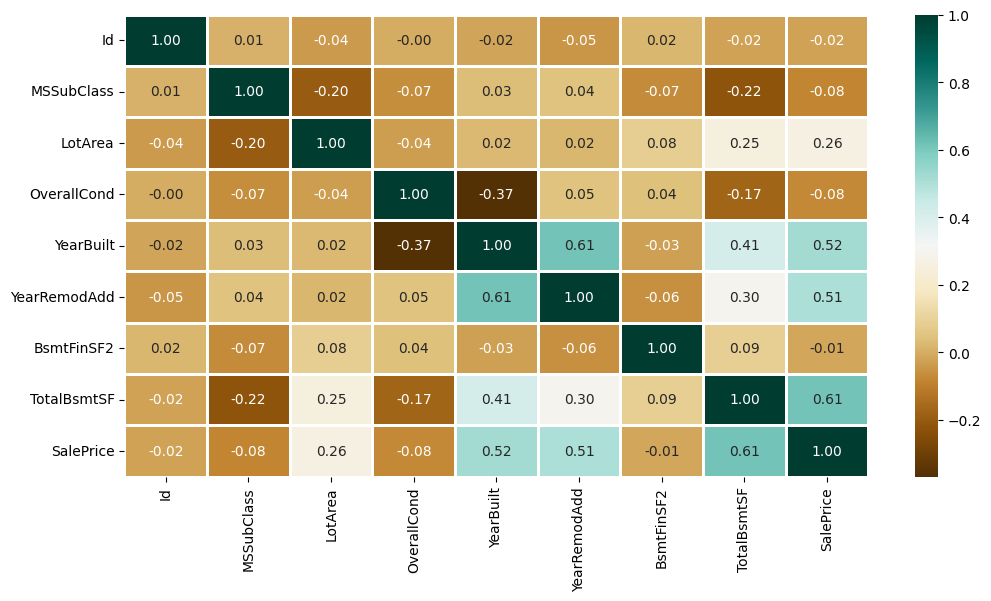

In [5]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# This code is modified by Susobhan Akhuli


To analyze the different categorical features. Let’s draw the barplot.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

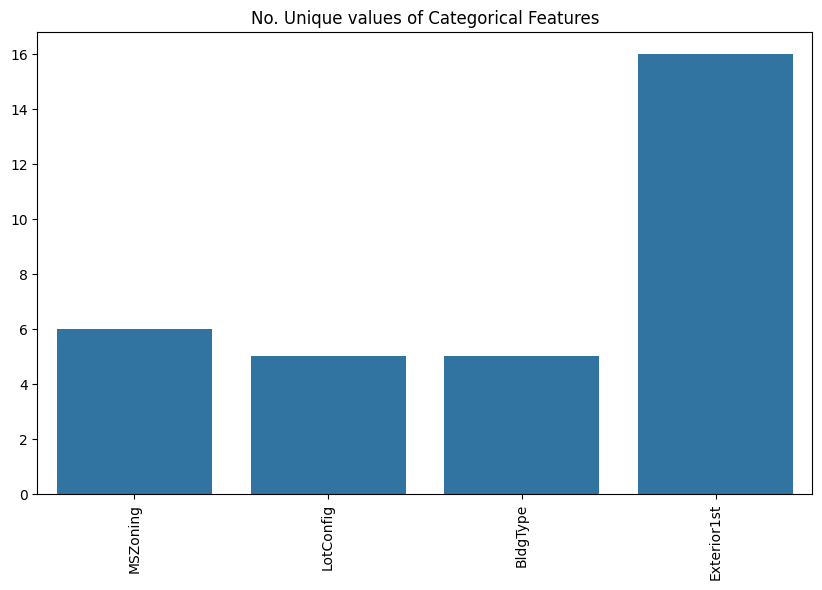

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

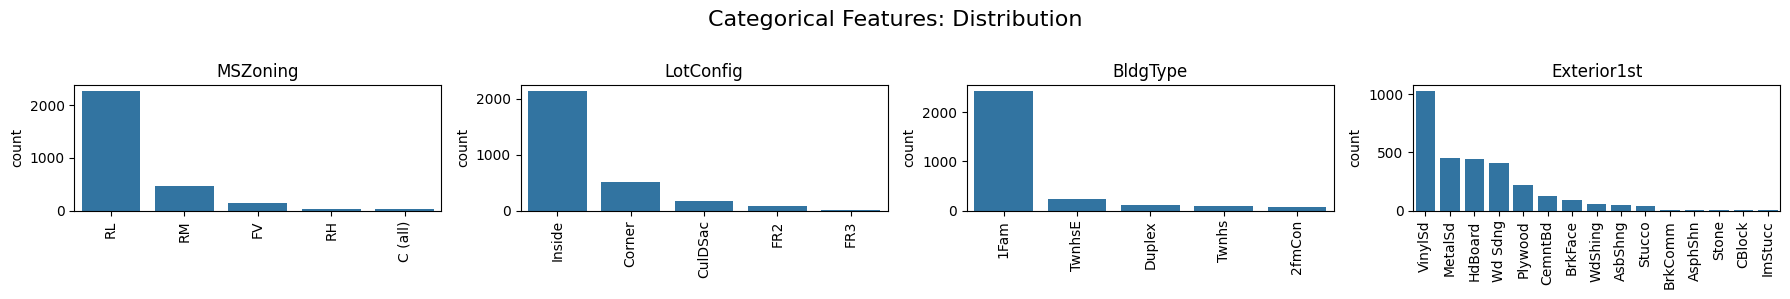

In [8]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Example object_cols (replace with your actual list of categorical columns)
object_cols = dataset.select_dtypes(include='object').columns

# Determine the number of subplots
num_plots = len(object_cols)

# Calculate grid dimensions (approximate square layout)
cols = 4
rows = math.ceil(num_plots / cols)

# Set up the figure
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))  # Adjust height dynamically
fig.suptitle('Categorical Features: Distribution', fontsize=16)
axes = axes.flatten()  # Flatten axes for easier indexing

# Plot each categorical column
for index, col in enumerate(object_cols):
    y = dataset[col].value_counts()
    sns.barplot(x=list(y.index), y=y, ax=axes[index])
    axes[index].set_title(col)
    axes[index].tick_params(axis='x', rotation=90)

# Remove unused subplots
for ax in axes[num_plots:]:
    ax.remove()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the suptitle
plt.show()


Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [9]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)


Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [10]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 


Drop records with null values (as the empty records are very less).

In [11]:
new_dataset = dataset.dropna()


Checking features which have null values in the new dataframe (if there are still any).

In [12]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [13]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [15]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# This code is modified by Susobhan Akhuli


### Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor
And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error : 



SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane. To read more about svm refer this.

In [17]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


#### Random Forest Regression

Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks. To read more about random forests refer this.

In [18]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.1932950715282489

### Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc. To read more about Linear Regression refer this.

In [19]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1874168384159986


#### CatBoost Classifier
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library. To read more about CatBoost refer this.





In [20]:
# This code is contributed by @amartajisce
!pip install catboost # install the catboost package
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

# This code is modified by Susobhan Akhuli


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 47.4ms	remaining: 47.4s
1:	learn: 55780.1567575	total: 48.3ms	remaining: 24.1s
2:	learn: 55060.9599505	total: 49.1ms	remaining: 16.3s
3:	learn: 54456.1126921	total: 49.9ms	remaining: 12.4s
4:	learn: 53901.1464265	total: 50.9ms	remaining: 10.1s
5:	learn: 53334.6062357	total: 51.7ms	remaining: 8.56s
6:	learn: 52824.4943646	total: 52.5ms	remaining: 7.45s
7:	learn: 52381.4267520	total: 53.3ms	remaining: 6.61s
8:	learn: 51841.0364316	total: 54.1ms	remaining: 5.96s
9:	learn: 51281.5852560	total: 55ms	remaining: 5.44s
10:	learn: 50825.3817438	total: 55.8ms	remaining: 5.01s
11:	learn: 50477.2609796	total: 56.6ms	remaining: 4.66s
12:	learn: 50081.4097641	total: 57.5ms	remaining: 4.36s
13:	learn: 49663.6380360	total: 58.3ms	remaining: 4.1s
14:	learn: 49334.5782662	total: 59.1ms	remaining: 3.88s
15:	learn: 48967.52210

0.38351169878113034

### Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.